## Dataset: Vendes de Videojocs 

Aquest dataset conté informació sobre vendes de videojocs segons platafroma,any,etc... . 

### Variables incloses en el dataset:
1. **Game**: El titol del videojoc (nom del joc).
2. **Year**: L'any en que es va llançar el videojoc.
3. **Platform**:La plataforma del joc
4. **Genre**: El gènere del videojoc (accio, esports, rol, etc.).
5. **Publisher**: La companyia que va publicar el videojoc.
6. **North America**: Vendes en milions de còpies a Amèrica del Nord.
7. **Europe**: Vendes en milions de còpies a Europa.
8. **Japan**: Vendes en milions de còpies al Japo.
9. **Rest of World**: Vendes en milions de còpies a altres regions.
10. **Global**: Vendes globals totals en milions de còpies.

In [111]:
!pip install seaborn

In [112]:
import pandas as pd
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import os
df = pd.read_csv('videojuegos.csv')




In [113]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [102]:
#2
print("Longitud del dataset:", len(data))

Longitud del dataset: 16598


In [103]:
# 3
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None
               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.8

<Axes: title={'center': 'Ventas per any y plataforma'}, xlabel='Any', ylabel='Ventas'>

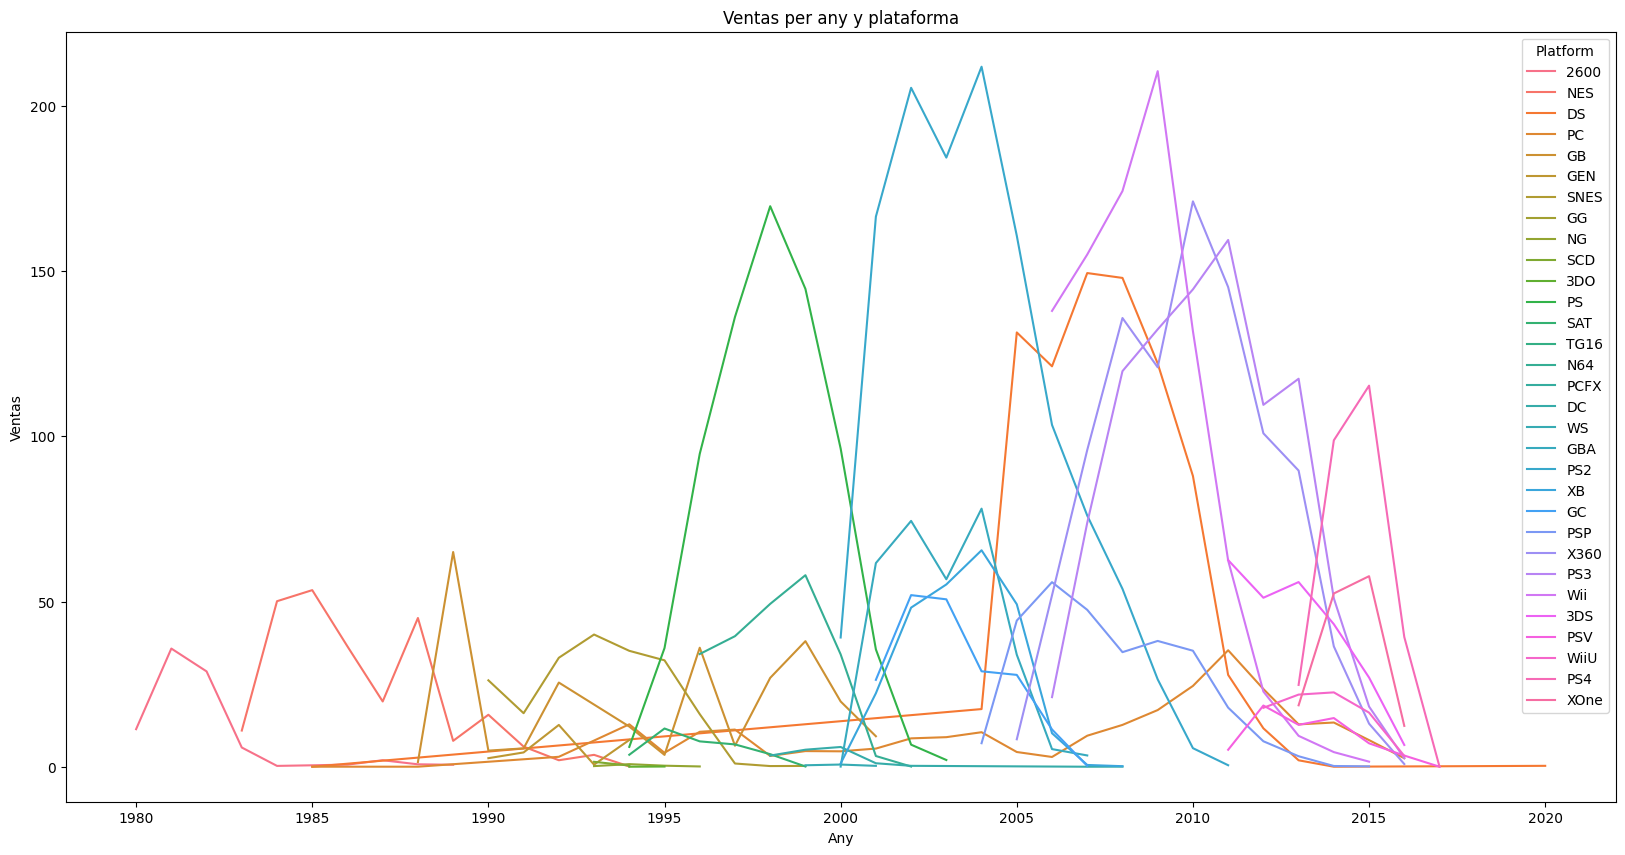

In [104]:
# Pregunta 0 Ventas per any segons la  plataforma
ventas_per_any_segons_plataforma = df.groupby(['Year', 'Platform']).Global_Sales.sum().to_frame().reset_index()

plt.figure(figsize=(20,10))
plt.title('Ventas per any y plataforma')
plt.xlabel('Any')
plt.ylabel('Ventas')

sns.lineplot(data=ventas_per_any_segons_plataforma, x='Year', y='Global_Sales', hue='Platform')

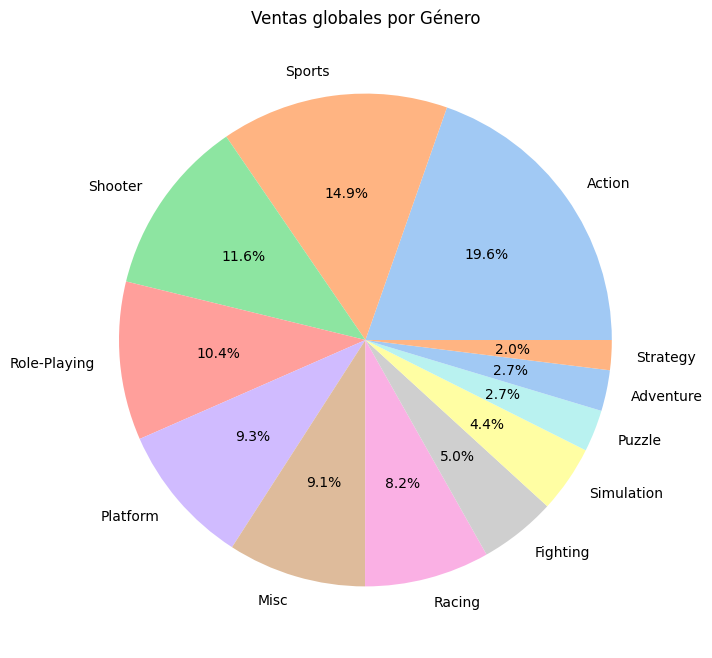

In [105]:
# Pregunta 1: Ventas por género
ventas_por_genero = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

colors = sns.color_palette('pastel')
plt.figure(figsize=(10, 8))
ventas_por_genero.plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Ventas globales por Género')
plt.ylabel('') 
plt.show()

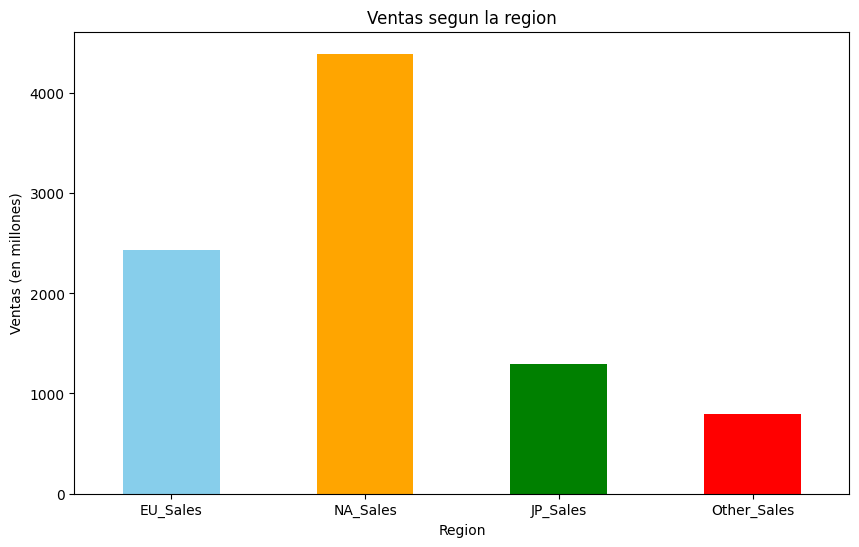

In [106]:
# Pregunta 2: Cuales son las ventas segun la region?
ventas_regionales = df[['EU_Sales', 'NA_Sales', 'JP_Sales', 'Other_Sales']].sum()

plt.figure(figsize=(10, 6))
ventas_regionales.plot(kind='bar', color=['skyblue', 'orange', 'green', 'red'])
plt.title('Ventas segun la region')
plt.xlabel('Region')
plt.ylabel('Ventas (en millones)')
plt.xticks(rotation=0)
plt.show()

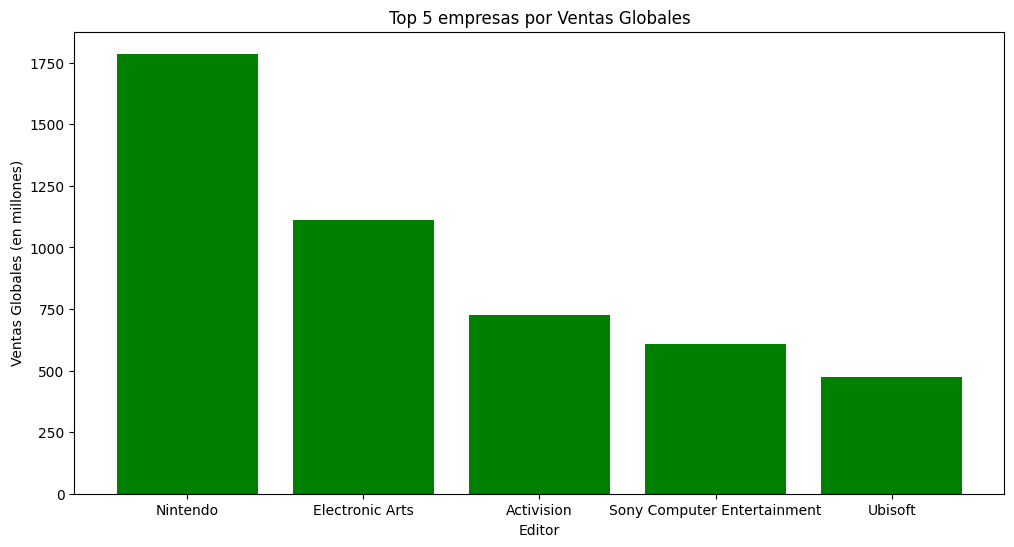

In [107]:
# 3: Calcular las 5 editoras con mayores ventas globales
ventas_por_editor = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5)

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(ventas_por_editor.index, ventas_por_editor.values, color='green')
plt.title('Top 5 empresas por Ventas Globales')
plt.xlabel('Editor')
plt.ylabel('Ventas Globales (en millones)')
plt.show()


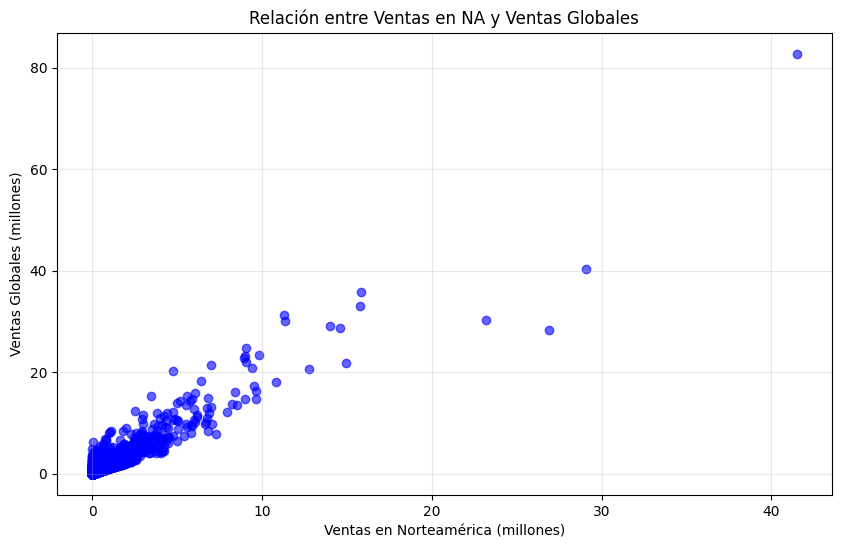

In [110]:
# 4: Relacion entre las ventas de NA y las globales

plt.figure(figsize=(10, 6))
plt.scatter(df['NA_Sales'], df['Global_Sales'], alpha=0.6, color='blue')
plt.title('Relación entre Ventas en NA y Ventas Globales')
plt.xlabel('Ventas en Norteamérica (millones)')
plt.ylabel('Ventas Globales (millones)')
plt.grid(alpha=0.3)
plt.show()


In [109]:
#El gráfico de puntos muestra que, , a medida que aumentan las ventas en NA, también incrementan las ventas globales, indica que gran parte de las ventas globales perteneces a NA.